In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv('data/mnist.csv')
df

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


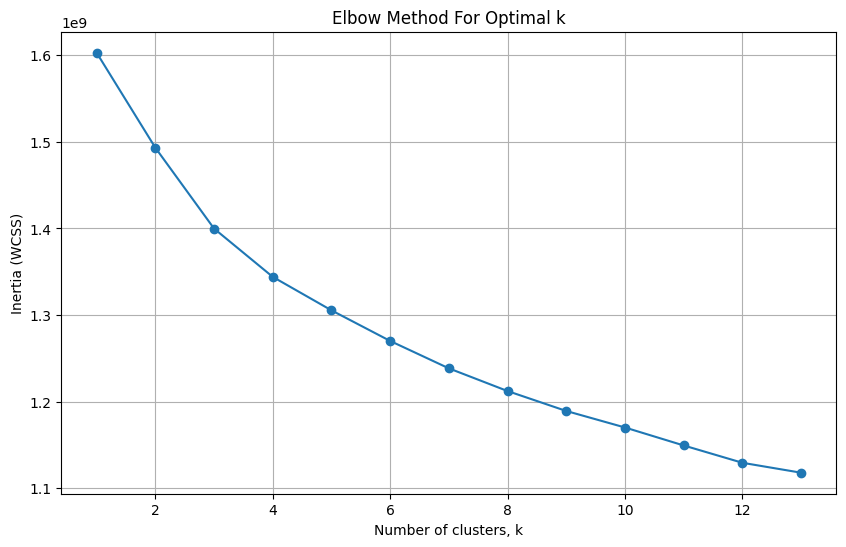

In [2]:

labels = df.iloc[:, 0]
data = df.iloc[:, 1:]

# Застосування K-means для різних значень k
inertia = []
k_values = range(1, 14)  # перевірка  кластеризації для k від 1 до 14

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)
    
# Побудова графіку для ліктевого методу
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [3]:
# Застосування K-means з k=12, саме там видно "лікоть" графіку
optimal_k = 12
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, max_iter=300)
clusters = kmeans_optimal.fit_predict(data)

clusters[:12]  

array([ 1, 11,  3,  4, 11,  0,  0,  8,  8, 10, 10,  0])

In [4]:
# Розрахунок метрик для оцінки якості кластеризації
#Також були розраховані метрики для інших кількостей кластеризації, однак 12 показала найкращі результати
ari = adjusted_rand_score(labels, clusters)
nmi = normalized_mutual_info_score(labels, clusters)

ari, nmi




(0.4121871404412056, 0.5477119080269873)

In [5]:

# Перевірка розмірності центрів кластерів
kmeans_optimal.cluster_centers_.shape


(12, 784)

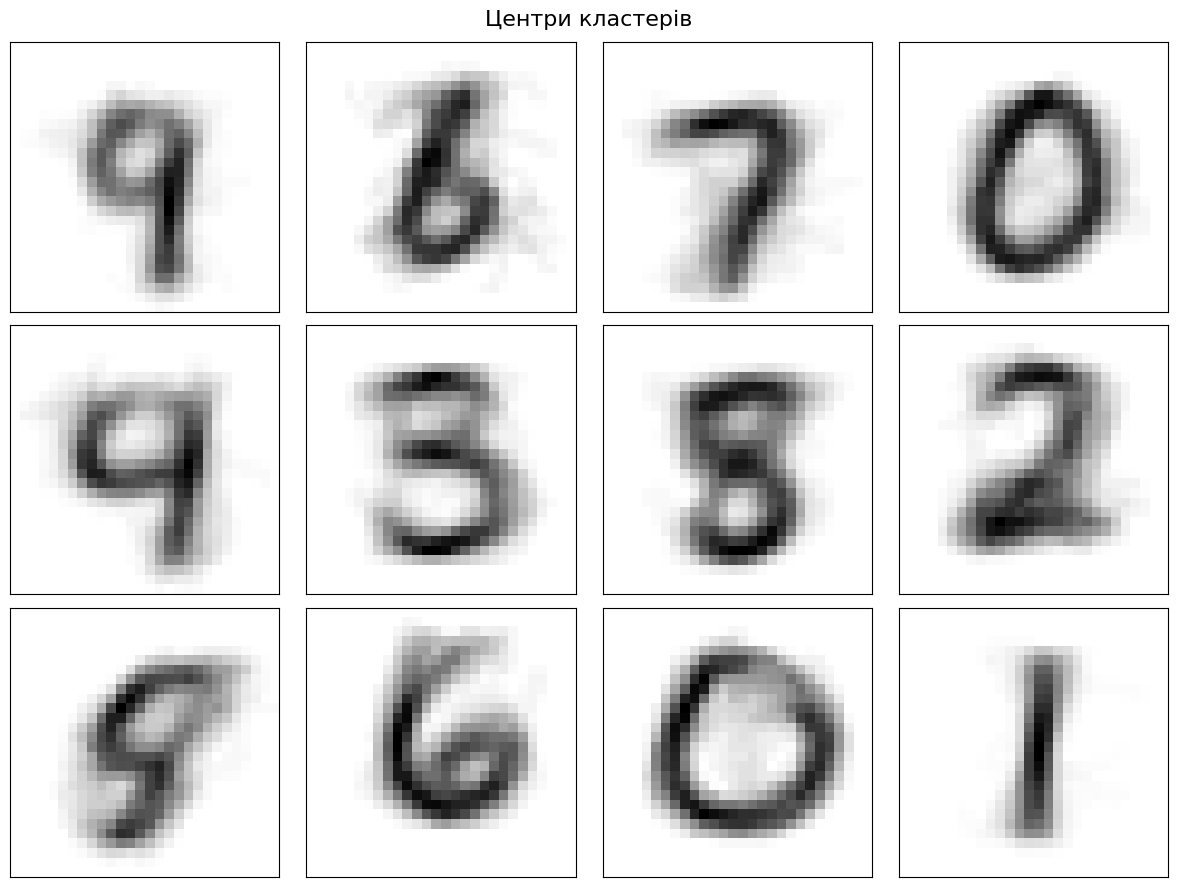

In [6]:
# Візуалізація центрів кластерів для optimal_k = 12
fig, ax = plt.subplots(3, 4, figsize=(12, 9))
centers = kmeans_optimal.cluster_centers_.reshape(12, 28, 28)

for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

plt.suptitle("Центри кластерів", fontsize=16)
plt.tight_layout()
plt.show()

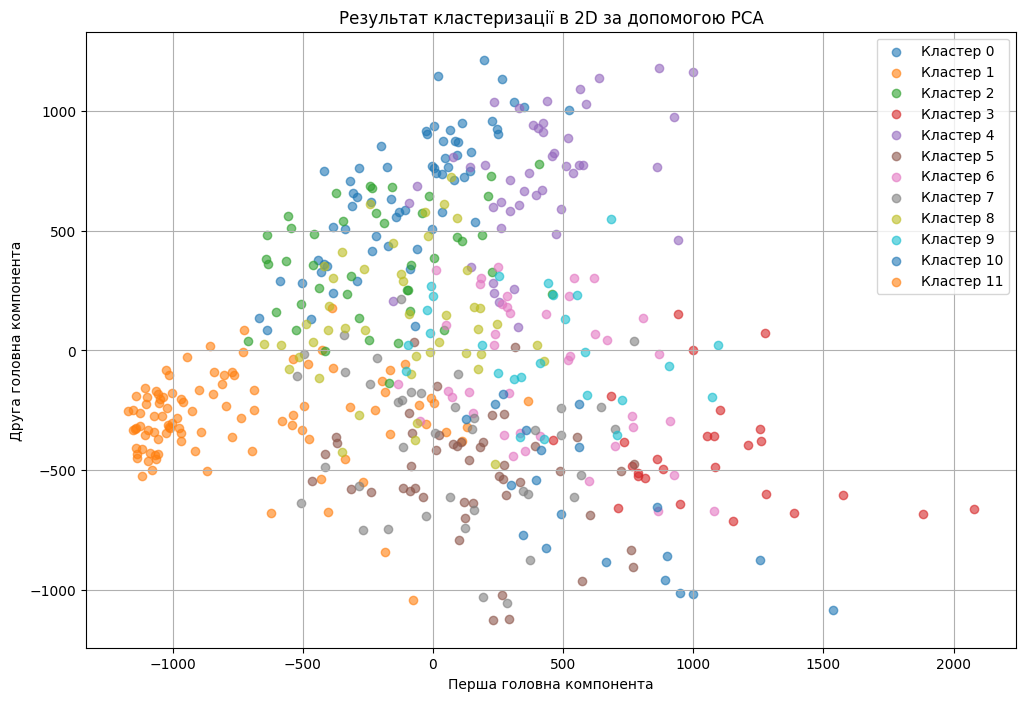

In [7]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

# Візуалізація результатів кластеризації  2D
plt.figure(figsize=(12, 8))
for i in range(optimal_k):
    cluster_data = reduced_data[clusters == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Кластер {i}', alpha=0.6)

plt.xlabel('Перша головна компонента')
plt.ylabel('Друга головна компонента')
plt.title('Результат кластеризації в 2D за допомогою PCA')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
df = pd.read_csv('data/data_2d.csv')
df

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482
...,...,...,...
194,1.0,0.629144,4.378584
195,1.0,-0.723824,5.361801
196,1.0,1.346107,2.333476
197,1.0,3.608219,3.411546


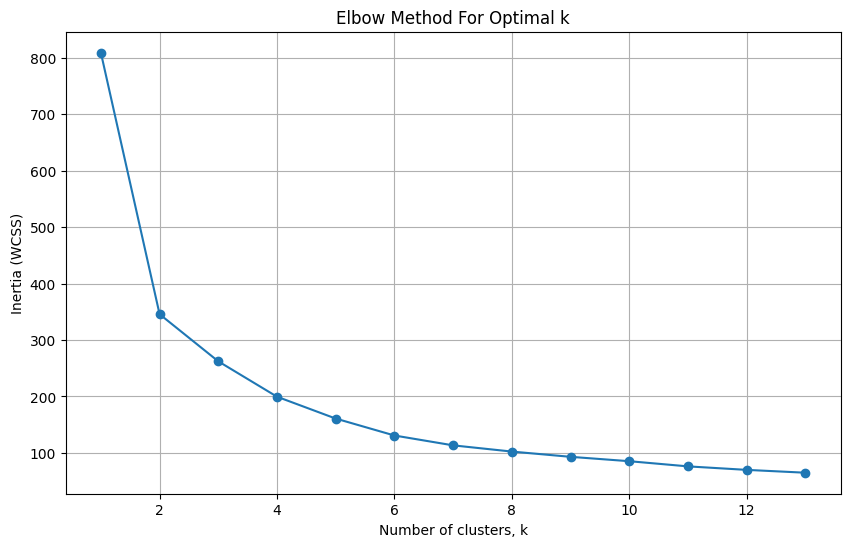

In [9]:

labels = df.iloc[:, 0]
data = df.iloc[:, 1:]

# Застосування K-means для різних значень k
inertia = []
k_values = range(1, 14)  # перевірка  кластеризації для k від 1 до 14

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)
    
# Побудова графіку для ліктевого методу
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [10]:
# Застосування K-means з k=2, саме там видно "лікоть" графіку
optimal_k = 2
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, max_iter=300)
clusters = kmeans_optimal.fit_predict(data)

clusters[:10] 

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [11]:
# Розрахунок метрик для оцінки якості кластеризації
#Також були розраховані метрики для інших кількостей кластеризації, однак 2 показала найкращі результати
ari = adjusted_rand_score(labels, clusters)
nmi = normalized_mutual_info_score(labels, clusters)

ari, nmi



(0.6205231018809018, 0.5171650276365373)

In [12]:

# Перевірка розмірності центрів кластерів
kmeans_optimal.cluster_centers_.shape


(2, 2)

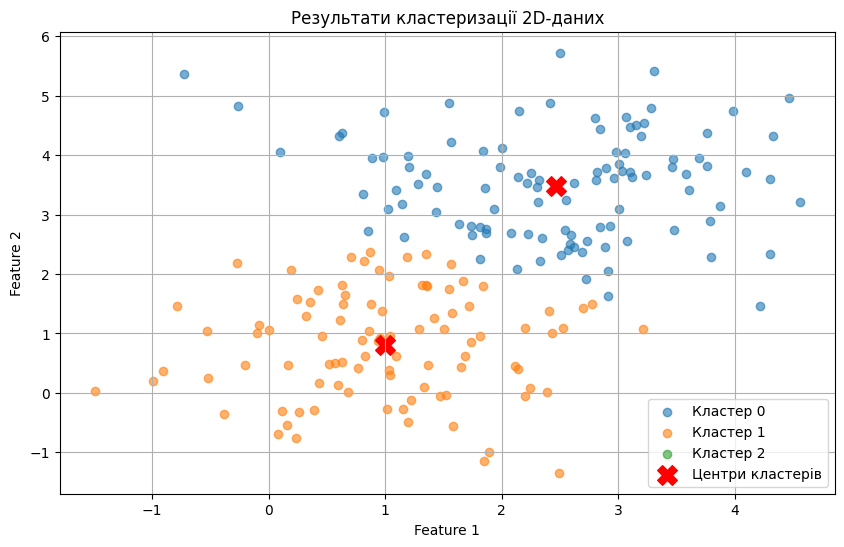

In [13]:
# Застосування K-means з оптимальним k=2
kmeans_2d = KMeans(n_clusters=2, random_state=42, n_init=10, max_iter=300)
clusters_2d = kmeans_2d.fit_predict(data)

# Візуалізація результатів кластеризації
plt.figure(figsize=(10, 6))
for i in range(3):
    cluster_data = data[clusters_2d == i]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Кластер {i}', alpha=0.6)

plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Центри кластерів')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Результати кластеризації 2D-даних')
plt.legend()
plt.grid(True)
plt.show()